In [ ]:
Задание 1: Загрузка и первичный анализ данных
Загрузите данные из файла use_type.csv в DataFrame.
Выведите первые 5 строк DataFrame для ознакомления с данными.

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("dataset.csv", encoding="utf-8", delimiter=";", engine='python')  
frame = pd.DataFrame(df) 
frame.head()

,year,state_agency,name,position,position_standard,family,use_type,use_meters,use_country
0,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,квартира,35.0,Россия
1,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,NaN,0.0,NaN
2,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,NaN,0.0,NaN
3,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,супруга,квартира,55.62,Россия
4,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,супруга,квартира,35.0,Россия


In [ ]:
Общая информация:
Выведите общую информацию о DataFrame, включая количество строк и столбцов, типы данных и количество ненулевых значений в каждом столбце.
Выведите статистическое описание числовых столбцов DataFrame.

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88071 entries, 0 to 88070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               88071 non-null  int64 
 1   state_agency       88071 non-null  object
 2   name               88071 non-null  object
 3   position           88071 non-null  object
 4   position_standard  88071 non-null  object
 5   family             88071 non-null  object
 6   use_type           41458 non-null  object
 7   use_meters         42339 non-null  object
 8   use_country        40774 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.0+ MB


In [5]:
# Заменяем '/' на NaN
frame['use_meters'] = frame['use_meters'].replace('/', np.nan)

# Преобразуем в числовой тип
frame['use_meters'] = pd.to_numeric(frame['use_meters'], errors='coerce') 
# Преобразуем в float64
frame['use_meters'] = frame['use_meters'].astype('float64')  
frame.dtypes

year                   int64
state_agency          object
name                  object
position              object
position_standard     object
family                object
use_type              object
use_meters           float64
use_country           object
dtype: object

In [7]:
frame.describe()

,year,use_meters
count,88071.000000,2.980400e+04
mean,2016.617967,4.829507e+02
std,2.243814,1.767774e+04
min,2013.000000,0.000000e+00
25%,2015.000000,4.510000e+01
50%,2017.000000,6.200000e+01
75%,2019.000000,8.470000e+01
max,2020.000000,1.598997e+06


In [ ]:
Задание 2: Очистка данных
Обработка пропущенных значений:
Проверьте наличие пропущенных значений в каждом столбце.

In [9]:
frame.columns

Index(['year', 'state_agency', 'name', 'position', 'position_standard',
       'family', 'use_type', 'use_meters', 'use_country'],
      dtype='object')

In [11]:
print(frame['year'].isna()) 
print(frame['state_agency'].isna())
print(frame['name'].isna()) 
print(frame['position'].isna()) 
print(frame['position_standard'].isna()) 
print(frame['family'].isna()) 
print(frame['use_type'].isna())
print(frame['use_meters'].isna())
print(frame['use_country'].isna())

0        False
1        False
2        False
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070    False
Name: year, Length: 88071, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070    False
Name: state_agency, Length: 88071, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070    False
Name: name, Length: 88071, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070    False
Name: position, Length: 88071, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070    False
Name: p

In [ ]:
Заполните пропущенные значения в столбце use_meters средним значением этого столбца.
Заполните пропущенные значения в столбце use_country строкой "Unknown".

In [21]:
frame['use_meters'] = frame['use_meters'].fillna(frame['use_meters'].mean())   
frame['use_country'] = frame['use_country'].fillna("Unknown")  
frame 

,year,state_agency,name,position,position_standard,family,use_type,use_meters,use_country
0,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,квартира,35.000000,Россия
1,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,NaN,0.000000,Unknown
2,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,чиновник,NaN,0.000000,Unknown
3,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,супруга,квартира,55.620000,Россия
4,2013,digital,Абрамов Глеб Авоевич,заместитель директора департамента реализации ...,заместитель директора департамента,супруга,квартира,35.000000,Россия
...,...,...,...,...,...,...,...,...,...
88066,2020,mnr,Юраков А.В.,начальник отдела,начальник отдела,чиновник,NaN,482.950729,Unknown
88067,2020,mnr,Якушин А.А.,начальник отдела,начальник отдела,чиновник,Квартира,482.950729,Россия
88068,2020,mnr,Якушин А.А.,начальник отдела,начальник отдела,супруга,Квартира,482.950729,Россия
88069,2020,mnr,Якушин А.А.,начальник отдела,начальник отдела,ребенок,Квартира,482.950729,Россия


In [ ]:
Удаление дубликатов:
Проверьте наличие дубликатов строк в DataFrame.
Удалите дубликаты, если они есть.

In [35]:
duplicates = frame.duplicated() 
duplicates

0        False
1        False
2         True
3        False
4        False
         ...  
88066    False
88067    False
88068    False
88069    False
88070     True
Length: 88071, dtype: bool

In [37]:
if duplicates.any():
  frame = frame.drop_duplicates()
  print("Дубликаты удалены") 

Дубликаты удалены


In [39]:
#проверка на наличие дубликатов после удаления
frame.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
88065    False
88066    False
88067    False
88068    False
88069    False
Length: 57014, dtype: bool

In [ ]:
Задание 3: Анализ данных
Анализ по годам:
Посчитайте количество записей для каждого года.
Постройте график распределения количества записей по годам.

In [43]:
year_counts = frame['year'].value_counts().sort_index()
print("Количество записей по годам:\n", year_counts) 

Количество записей по годам:
 year
2013    6718
2014    6035
2015    6937
2016    7262
2017    7831
2018    7703
2019    7378
2020    7150
Name: count, dtype: int64


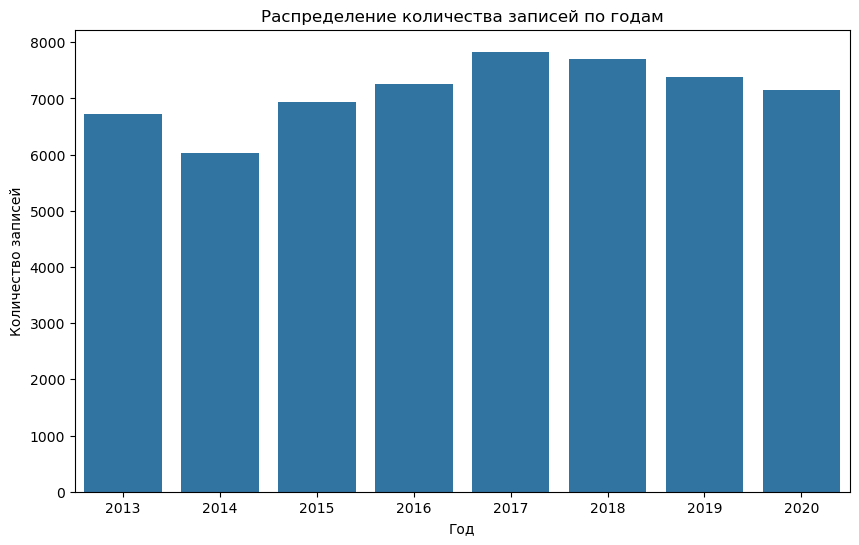

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Распределение количества записей по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.show() 

In [ ]:
Анализ по государственным агентствам:
Найдите топ-5 государственных агентств с наибольшим количеством записей.
Постройте график распределения количества записей для этих агентств

In [59]:
top_agencies = frame['state_agency'].value_counts().nlargest(5) 
top_agencies

state_agency
economy    7961
minprom    7358
minfin     7339
mcx        3392
minobr     3207
Name: count, dtype: int64

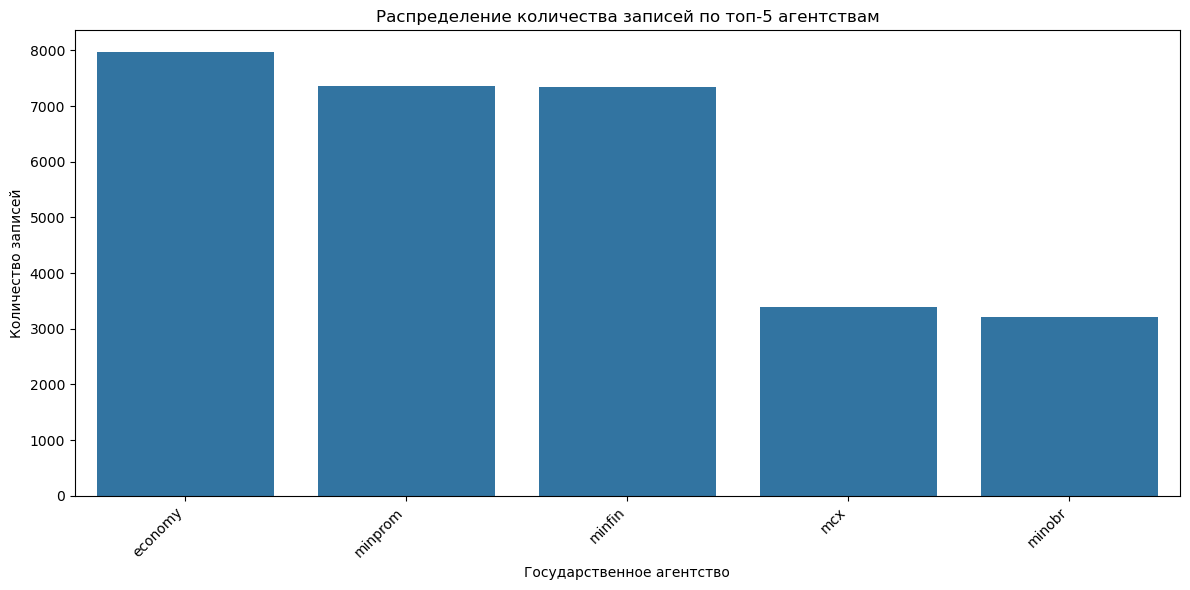

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_agencies.index, y=top_agencies.values)
plt.title('Распределение количества записей по топ-5 агентствам')
plt.xlabel('Государственное агентство')
plt.ylabel('Количество записей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Анализ по типу использования:
Посчитайте общее количество метров для каждого типа использования (use_type).
Постройте график распределения общего количества метров по типам использования.

In [63]:
use_type_totals = frame.groupby('use_type')['use_meters'].sum() 
print("Общее количество метров по типам использования:\n", use_type_totals) 

Общее количество метров по типам использования:
 use_type
1 347 415, 03                        482.950729
1,092,950.73                         482.950729
1,284,441.01                         482.950729
1,297,148.33                         482.950729
1,530,914.21                         482.950729
                                       ...     
хозяйственное строение              1990.802915
частный дом                          219.100000
часть блокированного жилого дома    1494.000000
часть жилого дома                    455.500000
часть нежилогопоме | щения           482.950729
Name: use_meters, Length: 596, dtype: float64


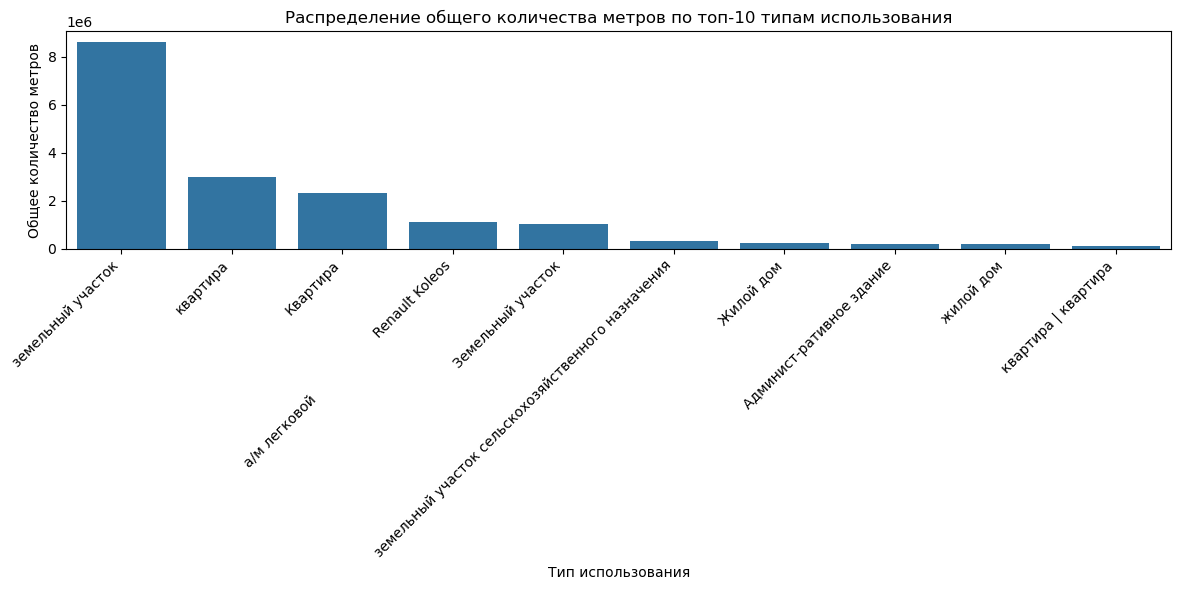

In [73]:
top_n = 10
top_use_types = use_type_totals.nlargest(top_n)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x=top_use_types.index, y=top_use_types.values)
plt.title(f'Распределение общего количества метров по топ-{top_n} типам использования')
plt.xlabel('Тип использования')
plt.ylabel('Общее количество метров')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Задание 4: Группировка и агрегация данных
Группировка по годам и государственным агентствам:
Сгруппируйте данные по годам и государственным агентствам и посчитайте общее количество метров для каждой группы.
Постройте сводную таблицу для этих данных.

In [79]:
grouped_data = frame.groupby(['year', 'state_agency'])['use_meters'].sum().reset_index() 
pivot_table = grouped_data.pivot_table(index='year', columns='state_agency', values='use_meters', fill_value=0) 
pivot_table

state_agency,digital,economy,mcx,mincult,minenergo,minfin,minjust,minnauki,minobr,minprom,minprosvet,minsport,minstroy,mintrans,mintrud,minvr,minzdrav,mnr
year,,,,,,,,,,,,,,,,,,
2013,16749.020000,0.000000e+00,160791.711664,178267.615998,300728.605191,314407.300819,130946.571988,0.000000,0.000000,708359.217351,0.000000,111118.667615,0.000000,83893.849314,112044.569073,9.955579e+04,114472.979922,164323.740491
2014,16212.000000,0.000000e+00,172639.315105,154494.128831,178197.676645,200401.546321,133931.647494,0.000000,362005.964665,333236.002845,0.000000,94701.342837,192126.065269,100012.301906,121361.731462,1.259850e+06,69793.894739,86610.476076
2015,87947.582350,6.419363e+05,136686.095023,127259.090935,145851.120086,203545.874661,156476.036119,0.000000,347605.387986,318621.678067,0.000000,92243.589193,20166.900000,95553.042432,121703.583648,1.193161e+05,137640.957697,85717.525347
2016,94933.283079,6.602279e+05,114327.018059,119199.928547,143778.464985,207334.351949,158407.839034,0.000000,282254.313204,171959.516037,0.000000,53884.611945,12580.800000,103741.771703,126050.140207,1.023677e+05,187867.833488,91852.081906
2017,109435.397654,6.407961e+05,154104.500854,138240.957697,152463.578102,260708.976201,135226.204053,0.000000,404133.515678,267317.444903,0.000000,63585.014860,52879.645183,106303.273161,131362.598223,7.835858e+04,112241.984821,109063.111056
2018,85269.467046,6.822790e+05,136777.584821,124255.186563,148599.972272,254739.681302,165652.099965,91755.252755,0.000000,310362.911341,72442.609314,63441.364131,42507.287167,504138.574618,141021.612798,9.634896e+04,123932.248667,107908.060327
2019,88098.941419,3.674780e+06,121325.132635,93341.168504,160822.592677,209729.907697,147299.972272,97191.504942,0.000000,224949.209883,70164.248383,51933.962673,54252.391539,158734.029720,110242.166158,1.025821e+05,116626.520448,107336.109599
2020,84125.236723,3.784883e+06,116221.625347,45951.146641,119288.830004,251432.781017,177242.917455,108075.294739,0.000000,286487.564985,69360.797654,91251.020690,22127.000000,80226.244010,136675.056239,6.185238e+04,87262.555670,104959.455955


In [ ]:
Анализ по должностям:
Найдите топ-5 должностей с наибольшим количеством записей.
Посчитайте среднее количество метров для каждой из этих должностей.

In [91]:
top_roles = frame['position'].value_counts().nlargest(5) 
top_roles

position
начальник отдела                      13905
заместитель директора департамента    11068
Референт                               4686
директор департамента                  4103
начальник отдела в департаменте        3735
Name: count, dtype: int64

In [97]:
 #Фильтруем DataFrame, оставив только записи с топ-5 должностями
filtered_frame = frame[frame['position'].isin(top_roles.index)]
filtered_frame

,year,state_agency,name,position,position_standard,family,use_type,use_meters,use_country
2187,2017,digital,Доронкин Алексей Сергеевич,директор департамента,директор департамента,чиновник,NaN,482.950729,Unknown
2189,2017,digital,Доронкин Алексей Сергеевич,директор департамента,директор департамента,супруга,Квартира,72.500000,Россия
2190,2017,digital,Доронкин Алексей Сергеевич,директор департамента,директор департамента,ребенок,Квартира,72.500000,Россия
3180,2019,digital,Былинкина Юлия Сергеевна,начальник отдела,начальник отдела,чиновник,NaN,482.950729,Unknown
4327,2015,economy,Абрамян Р. М.,директор департамента,директор департамента,чиновник,квартира,74.300000,Россия
...,...,...,...,...,...,...,...,...,...
88065,2020,mnr,Щукин А.В.,начальник отдела,начальник отдела,супруга,NaN,482.950729,Unknown
88066,2020,mnr,Юраков А.В.,начальник отдела,начальник отдела,чиновник,NaN,482.950729,Unknown
88067,2020,mnr,Якушин А.А.,начальник отдела,начальник отдела,чиновник,Квартира,482.950729,Россия
88068,2020,mnr,Якушин А.А.,начальник отдела,начальник отдела,супруга,Квартира,482.950729,Россия


In [99]:
# Группируем данные по должностям и считаем среднее количество метров
average_meters = filtered_frame.groupby('position')['use_meters'].mean() 
average_meters

position
Референт                              306.733729
директор департамента                 363.882824
заместитель директора департамента    981.814915
начальник отдела                      410.472066
начальник отдела в департаменте       300.816396
Name: use_meters, dtype: float64